In [509]:
%matplotlib inline

import pandas as pd
import logging
import itertools
import numpy as np
import gensim
import matplotlib
import matplotlib.pyplot as plt
import nltk

In [541]:
data = pd.read_csv("topics_description.csv")

In [511]:
data.head()

,Unnamed: 0,link_to_ico,token_name,name,about,tags,short_desc,full_desc
0,0,https://moeda.in/?utm_source=icobench,MDA,Moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...
1,1,https://neverdie.io/?utm_source=icobench,NDC,NEVERDIE,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...
2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,Rosenbridge Digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...
3,3,NaN,7SNC,S-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...
4,4,https://saharachain.com/?utm_source=icobench,SAND,Sahara Chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...


In [542]:
data = data[pd.notnull(data['about'])]
data = data[pd.notnull(data['token_name'])]
data = data[pd.notnull(data['full_desc'])]

In [543]:
tokentext = data["about"].map(str) + data["full_desc"]

In [544]:
data.about[2]

'Digital Direct Application Management System API. Is a cryptographic algorithm which clients will use to submit their funding application to the core banking system.\u200b\nDDAMS will provide streamlined protocol to deliver all client information to the core banking system to calculate product features in real time.\u200b\nDDAMS Will also provide the crypto register of share holders, the route to claim there drawing rights on annual profits.\n'

In [545]:
tokentext[2]

'Digital Direct Application Management System API. Is a cryptographic algorithm which clients will use to submit their funding application to the core banking system.\u200b\nDDAMS will provide streamlined protocol to deliver all client information to the core banking system to calculate product features in real time.\u200b\nDDAMS Will also provide the crypto register of share holders, the route to claim there drawing rights on annual profits.\nCommercial global financial services delivered digitally.'

In [546]:
freqstop=['blockchain',
 'platform',
 'token',
 'tokens',
 'market',
 'technology',
 'users',
 'world',
 'network',
 'based',
 'new',
 'services',
 'smart',
 'use',
 'crypto',
 'time',
 'digital',
 'ico',
 'value',
 'decentralized',
 'exchange',
 'project',
 'people',
 'business',
 'currency',
 'user',
 'create',
 'access',
 'ecosystem',
 'service',
 'investors',
 'community',
 'provide',
 'contracts',
 'industry',
 'transactions',
 'global',
 'coin',
 'way',
 'money',
 'able',
 'development',
 'transaction',
 'cryptocurrencies',
 'company',
 'assets',
 'contract',
 'information',
 'online',
 'team',
 'allows',
 'companies',
 'high',
 'future',
 'like',
 'funds',
 '000',
 'price',
 'projects',
 'process',
 'solution',
 'secure',
 'products',
 'peer',
 'sale',
 'open',
 'experience',
 'need',
 'asset',
 'help',
 'available',
 'developers',
 'app',
 'creating',
 'fees',
 'customers',
 'work',
 'product',
 'currencies',
 'application',
 'unique',
 'coins',
 'allow',
 'management']

In [547]:
freqstop += ["around","want","become","get","every","well","within","without","created","provides","new","uses","improve","making","made","powered","launch","first","one","using","make","also","system","used"]

In [548]:
stopset = set(nltk.corpus.stopwords.words('english'))
stopset.update(freqstop)
stopset.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])

"blockchain" in stopset

True

In [549]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stopset, min_df = 15)
A = tfidf.fit_transform(tokentext)

print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 1906 X 2366 TF-IDF-normalized document-term matrix


In [550]:
terms = tfidf.get_feature_names()

In [551]:
import operator
def rank_terms( A, terms ):
    sums = A.sum(axis=0)
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [552]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:50] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. data (53.88)
02. cryptocurrency (53.47)
03. ethereum (42.47)
04. trading (39.20)
05. real (35.45)
06. payment (34.74)
07. content (33.13)
08. financial (33.03)
09. investment (32.16)
10. game (29.06)
11. social (27.14)
12. security (26.18)
13. wallet (26.12)
14. mining (24.20)
15. mobile (23.73)
16. marketplace (22.90)
17. economy (21.78)
18. bitcoin (21.50)
19. fund (21.34)
20. energy (20.83)
21. internet (20.82)
22. built (20.69)
23. applications (20.34)
24. businesses (20.16)
25. trade (20.14)
26. distributed (19.98)
27. holders (19.94)
28. fiat (19.84)
29. protocol (19.83)
30. buy (19.76)
31. payments (19.74)
32. exchanges (19.60)
33. power (19.34)
34. games (19.19)
35. build (19.16)
36. players (19.13)
37. marketing (18.92)
38. traditional (18.84)
39. many (18.80)
40. existing (18.77)
41. technologies (18.63)
42. profit (18.53)
43. free (18.47)
44. designed (18.46)
45. support (18.37)
46. best (18.33)
47. markets (18.25)
48. chain (18.18)
49. offer (18.06)
50. platforms (18.04

In [578]:
k = 32

In [579]:
from sklearn import decomposition

model = decomposition.NMF( init="nndsvd", n_components=k ) 

W = model.fit_transform( A )
H = model.components_

In [580]:
W.shape

(1906, 32)

In [581]:
H.shape

(32, 2366)

In [582]:
term_index = terms.index('mobile')
H[:,term_index].round(2)

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.9,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [583]:
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [602]:
descriptors = []
labeled = {}
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 15) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d:\n%s\n" % ( topic_index+1, str_descriptor ) )
    #labeled[topic_index] = descriptors[topic_index][0] + " " + descriptors[topic_index][1]
    labeled[topic_index] = str(input().strip())

Topic 01:
payment, wallet, payments, card, merchants, cash, bitcoin, loyalty, debit, points, anonymous, spend, transfer, credit, fiat

payment
Topic 02:
game, games, players, cards, items, play, gamers, player, free, virtual, playing, card, economy, outside, developer

gaming
Topic 03:
data, personal, control, iot, store, database, share, api, insights, distributed, big, consumer, processing, chain, record

big data
Topic 04:
content, creators, media, news, copyright, rewards, revenue, quality, monetize, rights, distribution, reward, publishing, creator, creation

content & media
Topic 05:
energy, renewable, electricity, green, solar, power, clean, producers, consumers, production, sector, efficiency, waste, demand, markets

energy
Topic 06:
estate, real, property, properties, rental, construction, investment, invest, income, investments, land, city, portfolio, buy, buyers

real estate
Topic 07:
trading, trade, traders, exchanges, markets, trader, liquidity, trades, strategies, copy, o

In [603]:
labeled.values()

dict_values(['payment', 'gaming', 'big data', 'content & media', 'energy', 'real estate', 'trading', 'betting', 'industrial', 'crowdfunding', 'healthcare', 'advertising', 'startup financing', 'cryptocurrency', 'cryptocurrency', 'VR', 'security & privacy', 'mobile', 'social media', 'AI', 'cryptocurrency', 'travel', 'banking', 'cryptocurrency', 'commerce', 'betting', 'ticketing', 'consumer', 'identity verfication', 'entertainment', 'software', 'banking'])

In [595]:
for i in range(32):
    vals = ['consumer marketing', 'gaming', 'big data', 'media & content', 'energy', 'real estate', 'trading', 'betting', 'industrial', 'cryptocurrency', 'healthcare', 'advertising', 'startup financing', 'cryptocurrency', 'cryptocurrency', 'VR & entertainment', 'cybersecurity', 'mobile', 'banking', 'AI', 'cryptocurrency', 'banking', 'banking', 'social media', 'ticketing', 'betting', 'banking', 'entertainment', 'commerce', 'identity verification', 'software', 'travel']
    labeled[i] = vals[i]

In [587]:
fin_label = labeled

In [913]:
final_topics = [t for t in list(labeled.values()) if t is not ""]

In [916]:
final_topics.sort()

In [918]:
list(set(final_topics))

['VR',
 'content & media',
 'crowdfunding',
 'betting',
 'gaming',
 'entertainment',
 'commerce',
 'banking',
 'identity verfication',
 'consumer',
 'mobile',
 'startup financing',
 'healthcare',
 'software',
 'travel',
 'advertising',
 'real estate',
 'energy',
 'big data',
 'security & privacy',
 'industrial',
 'social media',
 'AI',
 'ticketing',
 'payment',
 'trading',
 'cryptocurrency']

In [604]:
scored = data.copy()

In [605]:
len(data)

1906

In [606]:
for i, row in scored.iterrows():
    text = tokentext[i]
    x = model.transform(tfidf.transform([text]))[0]
    scored.loc[i,'closest_topic'] = labeled[np.argmax(x)]
    scored.loc[i,'topic score'] = np.max(x)

In [607]:
scored.head()

,Unnamed: 0,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score
0,0,https://moeda.in/?utm_source=icobench,MDA,Moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,0.166931
1,1,https://neverdie.io/?utm_source=icobench,NDC,NEVERDIE,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859
2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,Rosenbridge Digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,0.102061
3,3,NaN,7SNC,S-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,0.146596
4,4,https://saharachain.com/?utm_source=icobench,SAND,Sahara Chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,0.137318


In [608]:
scored.to_csv("topic_ranked.csv")

In [610]:
topic_dist = data.groupby('closest_topic').size().sort_values(ascending=False)
topic_dist.plot(kind="bar",figsize=(40, 15),fontsize=40)

KeyError: 'closest_topic'

In [611]:
from sklearn.externals import joblib
joblib.dump(model, 'nmftopicmodel.pkl')

['nmftopicmodel.pkl']

# Trying cosine similarity using LSI model

In [ ]:
import re
from gensim import models, corpora, similarities
from nltk import word_tokenize
from nltk.corpus import stopwords
 
NUM_TOPICS = 25
STOPWORDS = stopwords.words('english')
 
def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stopset and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
for text in about:
    tokenized_data.append(clean_text(text))

dictionary = corpora.Dictionary(tokenized_data)
 
corpus = [dictionary.doc2bow(text) for text in tokenized_data]
print(corpus[20])

In [ ]:
len(corpus)

In [ ]:
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
doc = "betting gambling"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow] # convert the query to LSI space
print(vec_lsi)

In [ ]:
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims[:5])

about[888]

**Not very good though**


---

# 5 best match coins suggestions for a given query

## calculating cosine distance between a vectorized query and the nmf model for topics

In [621]:
from sklearn.metrics.pairwise import cosine_distances
 
def most_similar(query_doc, Z, top_n=5):
    x = model.transform(tfidf.transform([query_doc]))[0]
    dists = cosine_distances(x.reshape(1, -1), Z)
    pairs = enumerate(dists[0])
    most_similar = sorted(pairs, key=lambda item: item[1])[:top_n]
    return most_similar

In [622]:
len(about)

1969

In [623]:
query = "sports gambling"

about_sim = most_similar(query, W)
document_id, similarity = about_sim[0]

for docid, score in about_sim:
    desc = about[docid]
    print(str(docid))
    print(coin_about_map[desc[:15]])
    print(about[docid])

514
MZI
Our solution gives business owners control over the playlists and a better experience for its customers, with the opportunity to let them engage with the music right from their smartphones With Moozicore platform business owners get access to Moozicore Web Panel that allows to create their own vibe from a licensed library of over 20 million tracks. Also can customize their music library by choosing from our genre-specific catalogs, pre-built playlists, create their own using special tools or import their favorite playlists from Spotify or iTunes.
Moozicore’s goal is to evolve places such as bars, restaurants, gyms and any other entertainment venues by creating personalized, social music experience for each customer.
What is unique about our service is that it allows our customers access to a dynamic user experience for engaging with public music, TV display, social media and promotions right from their smartphones.
Customers use Moozicore mobile App to pick songs, vote on upcom

In [624]:
scored['full_desc'][1]

'The Neverdie ICO will finance the development of a multi-platform API for monetized gaming infrastructure to suppor a trillion dollar virtual goods economy.'

In [632]:
def coinsuggestion(data):
    for i, row in data.iterrows():
        print(row.token_name)
        
        similar_coins = []
        coin_str = ""
        
        try:
            query = row.full_desc
            mostsim = most_similar(query, W)
            document_id, similarity = mostsim[0]

            for coinid, score in mostsim:
                simcoin = data.iloc[coinid]['token_name']
                if simcoin is not row.token_name and type(simcoin) is str and simcoin not in similar_coins:
                    similar_coins.append(simcoin)

            coin_str = " ".join(similar_coins)
            data.loc[i,'similar_coins'] = coin_str 
            print(row.token_name)
            print(coin_str)
            print()
        except ValueError:
            pass

    return data

In [633]:
recom = coinsuggestion(scored)

MDA
MDA
LBT CGC Lendo SUR SCASH

NDC
NDC
DTB VRT VRBTC

RDCR
RDCR
CPAY HADA FSBT QTCt DALA

7SNC
7SNC
ASTR BURC CEL

SAND
SAND
ERA ORIO PYN

SPC
SPC
DROP GRD

SHINE
SHINE
ECHT FDM LST

SMS
SMS
STB ML ETKN

TMC
TMC
STAMP POA KAMI

TBX
TBX
NIO DTT COF

PAX
PAX
ZAB ABS VCS

UMC
UMC
EMV PNG HKN ZRX

VPY 
VPY 
MIV RDT

VSL
VSL
GOAL CBET 

APY
APY
AST ALS CASH

ANT
ANT
LUCD EVX LGL

AUT
AUT
CEL MNW WTT ARTE

BBC
BBC
HYB BTRM XWIN  GRZ BETM

CDT
CDT
XUC THT

CBET 
CBET 
play BETM WIN BETR MPRM

DME
DME
ZNT SWSToken INXT STO ARCHI

ECOB
ECOB
LOCI ZVD PTN

ESC
ESC
VRTM EVN H2O MNL DIG

ETHD
ETHD
MOS TFL PLAY

TCASH
TCASH
XPT TRDx LGO CFT LRC

RIYA
RIYA
PRO QEY QAT

XUC
XUC
DTR COB PLM

FLN
FLN
TRAK DTT COF XRL NIO

NTO
NTO
GTT CBC PXS STM BSK

INDIGO
INDIGO
iJproject DLT BDG OAK XCC

MNY
MNY
GLIF BFC GCTF SISA

NEB
NEB
ITT TKR Neuromation

ICS
ICS
NODE CSL HST QUA

PPC
PPC
VPY  MIV RDT

SAL
SAL
AMT BRICK HIRE MTX jNetCoin

SIFT
SIFT
KTM IVC NPX

ANYCOIN
ANYCOIN
ETB SKRP APIS PYN MOM

HUB
HUB
HM

SED
PrimeCoin XCC KC DES DLT

LXC
LXC
MNG Start GCTF BFC

MNG
MNG
Start SISA PVC GLIF ASTRO

MVN
MVN
ALIS FDZ KRI SMT KARB

MDX
MDX
ORI CNT NAT BEATLE

NVT
NVT
VAR GIFTO IMV CAPP VRP

Neuromation
Neuromation
LMN NSD BNS GAI ATT

OBZ
OBZ
SVD MAG BIX BNS

PMNT
PMNT
TWNKL SAND

PIP
PIP
BITS PINNS BZS ACT

PLAZA
PLAZA
TEW PMT PZM OPEN

MTT
MTT
KLS EMA POE Flixx

QUA
QUA
AutoToken (ATK) PBL CCT PRO HBY

RPX
RPX
DVT THT DXT ENT

CVT
CVT
PKC SNOV DXT RC VLD

SHPN
SHPN
N1D BCS HRB

MFG
MFG
QILIN SHPING BTQ ZAPIT FINC

TWN
TWN
GLDY DMT ASP VOCO

TMC
TMC
QSP PRYZ RDN UTN

WT
WT
TERN ADX DEAL BM BAT

BNK
BNK
AMM BLT DTRC CNC

BCS
BCS
HIG SWEEP ATMT

IDS
IDS
XID KEY Token VXD 

BTR
BTR
STO INXT CTK TSS

UMT
UMT
DAP SmartProgress Token MFL

CAPP
CAPP
IMV VAR VRP GIFTO

CARE
CARE
MEDX WELL MDTK TDH

CBC
CBC
ADP SHPING CAT DIGIT AFL

CBT
CBT
FDM UBER TFOOD ECOS

DOCK
DOCK
GNX EPO SMT TopiaCoin DRGN

EHB
EHB
EVX LGL SER EVA DTRC

Eroiy
Eroiy
FAP BLN

Ethix
Ethix
PCO SCOI CHSB CRWT

FXT
FXT
KatalystCoi

MNTS
MTX BRICK jNetCoin 3DT

ITR
ITR
SQEX RNT XGM RPT

IRYO
IRYO
MDTK HLTH HER WELL MEDX

KPY
KPY
STM LCN MOM Credo PXS

LCX
LCX
KatalystCoin CTT ZIG DAE SLK

MGT, MGC
MGT, MGC
GGS CHI  RUSTBITS GMIT MTZ

M.O.M.
M.O.M.
CAPP VAR VRP GIFTO

NUG
NUG
OFT ICOP AUTH CVT SHELLS

PRS
PRS
TILE NUG YBK VLD

PM7
PM7
TERN BM ADX ATTN DEAL

NCT
NCT
PRIX SCT CTK INXT WCXT

CHIP
CHIP
EDG GMBC TTT FUN

REXX
REXX
DMarket WAX WHS MOON

SQZ
SQZ
ZCO ZNA DNA ENT

TKN
TKN
GCTF NOUS GLIF BFC

TopiaCoin
TopiaCoin
STORJ SPARC FNT Q1S

TBT
TBT
GIG SER CRYDER OMG CL

UBT
UBT
R Token MODO NEO FND PHI

WIN
WIN
SKR HORSE play MPRM

WYS
WYS
CAK THRT RCoin CAT

ZAPIT
ZAPIT
QILIN NAT FINC BEATLE

ACO
ACO
LTO WEL TTP-A

BUX
BUX
RMT STAT NAU DAP

BEE
BEE
KCY ET4 EVC TKT

BEC
BEC
EDO STC CMS CST TLT

B1x
B1x
EQUI LOFF MFL MOC

ISP
ISP
WRL SSH SPARC DAC

CID
CID
XID IDS TKY

CTV
CTV
PDL KNOWS ADH ROC

KAMI
KAMI
SHA KIT DAR CTF

DNO
DNO
IWT SPEND Blockpay APY

DPD
DPD
MRK CEEK Sigs ESCP

DXBC
DXBC
ATS GFI TEAM

GPT
GPT
ARK

HLP
BKRx HER SHP MedToken

LAB
LAB
ICS IML TUB TFT

TILE
TILE
VLD PKC RC DAT DOPA

MNT
MNT
BTQ INS SSH QILIN

MOON
MOON
STAT QRT BUX PlusCoin

NOCTA
NOCTA
BMC SSIO TFT PCO KEP

NLC
NLC
BITTO QUA BID SPECTRE

PTN
PTN
ZVD FRAS SQEX PBT KEX

NEWS
NEWS
ZDR RAO EMA KLS Flixx

PMA
PMA
NET INK RDN

RDT
RDT
VPY  MIV

SQEX
SQEX
HCT RNT RLTY NDV

Gram
Gram
TEW HYC NEBL PMT

TIPR
TIPR
ONG WEBCOIN AKT SCL ALIS

IAR
IAR
CFUN FTR DNN YOYOW

XDCE
XDCE
DTR PLM SPECTRE FXT

ZOD
ZOD
CPAY HADA OX DALA QTCt

LION
LION
GCTF EQUItoken BFC

ATMT
ATMT
FSBT SER CPAY OX FineCoin

CARCO
CARCO
NEWS ZDR TND ASP

CAS
CAS
WPX CCT XMN TKC REF

CBC
CBC
HAV OZT ADL TIP ARCC

EGH
EGH
BNS AGI ATT GAI

EPOS
EPOS
BITTO STE QUA ABX

JACK
JACK
BCY MTZ HJC RUSTBITS

FineCoin
FineCoin
EON FSBT NEXT DTRC

GLU
GLU
CAJUTEL ISP TELE TFT PRIX

HYB
HYB
GOAL BETM play GRZ WIN

HYD
HYD
GCTF GLIF Wishcoin BFC

KALA
KALA
HUB Lif AST BBCoin

KTM
KTM
KBX TBX UTT

GMT
GMT
QSP RDN PRYZ NAS

MOM
MOM
EON PTX 88 Coin MNC PGC

MZX
MZX
DOBI NUB 

RBM
MEDX WELL MDTK TDH HLTH

SOL
SOL
ACT PDC SETH ONG

SNM
SNM
EMT GYM CNF STMG Tourcoin

SPF
SPF
MPRM HORSE UnikoinGold XWIN 

SRG
SRG
SPX CHP SHA KBR

DIVX
DIVX
MOM Credo PYN STM VLP

TPAY
TPAY
DAY XCJ ODN BITSD

ACE
ACE
KCY TKT ET4 STUB TIX

TRST
TRST
GLXC KALA IPL  CHSB

AST
AST
MTH ACT MTX NAT

AIX
AIX
TNT DIW IMGZ PKC

CAT
CAT
TERN ADX DEAL BM BENJA

BON
BON
ITC TSS TUC NRG

POLL
POLL
BRAT BDG BICO iJproject XCC

CO2
CO2
THNX PYN MOM STM

CPAY
CPAY
RSN HADA QTCt FSBT

DCN
DCN
UET AET HIG

3DC
3DC
NDC CEEK VRT MRK

DDD
DDD
SVT NOUS AIM GXVC CCOS

ERT
ERT
IAC SNP SED CRC NRV

ESR
ESR
IWT APY SPEND

GIM
GIM
HT WGR SKR FAN

GOAL
GOAL
WIN BETM BETR GRZ SKR

ICX
ICX
TAU KIT RNT INK TLT

PRG
PRG
TEW KIN UBT TLT

PBL
PBL
DRT VHL FPT GRCR jNetCoin

REQ
REQ
PAT QSP WINGS LINE

SAN
SAN
SMDQ IPS SNP LEWT

SETH
SETH
MESH SCL ONG KARB

SPHTX
SPHTX
CHX CMT NEO ACX

STAR
STAR
iJproject CFI DLT BDG OAK

UTT
UTT
TIO GVT DOL SPECTRE

ADX
ADX
TERN BAT BM DEAL

VEE
VEE
HYC NEBL ST AUDT

CAS
CAS
CS FS

TMN
MET PRIV 7ype GLU

ALLY
ALLY
BERRY RXL HNR WCXT SPC

VUP
VUP
GFI ALX ATTN ADX

WRL
WRL
CTK BTR ETT INXT STO

ZAP
ZAP
DAT PKC DOPA DXT IND

Zempa
Zempa
HRB MET CHT YUPIE HPC

ADST 
ADST 
TERN ADX BAT BM

ACO
ACO
PVC MNG ASTRO GNC Start

ANK
ANK
HADA OX CPAY DALA

NE0
NE0
TRDx LGO LRC XPT

ASET
ASET
BNK DNO VXT

ATN
ATN
DOPA THT FTT SYN Neuromation

BTN
BTN
300 w3c MET

BEE
BEE
HMT BZS STQ AMT fdX

Credo
Credo
MOM PYN STM PXS

BOPTI
BOPTI
PTN SBL ECOB

CFUN
CFUN
IAC NRV YOYOW

CHARG
CHARG
FIL SCT DADI STY ETT

DLBX
DLBX
ERT KC McCoin SBL YUPIE

DENT
DENT
DAP LOFF TEL UMT

DRGN
DRGN
AUDT VRD ZAP BIRD

ETB
ETB
Robot coin VSA ALG TAY STE

H2O
H2O
FRNC WAT SFC FRD ETK

JDC
JDC
AMO PQT CHA CAMX

LTA
LTA
WELL MedToken MDTK MEDX HLTH

ART
ART
TRU MTH Fors VLS

NTRY
NTRY
UMT SmartProgress Token TEL MFL

OPO
OPO
FRU DAE KatalystCoin BID

PTOY
PTOY
MDC VDOC AHT MedToken

RAC
RAC
BNS AGI ATT GAI VIOLA

SXP
SXP
CCORE COP ORIO VITO CIF

SNTR
SNTR
VPY  MIV

SOFIN
SOFIN
HERO P2pay CGC INSP FTX

STY

MODO
VEE CARD XTZ EOS

PQT
PQT
KIT TAU XTZ CTF INK

PXT
PXT
BMC FIT BFT BANCA

RTC 
RTC 
LIKE ATL REAL Certificate

Robot coin
Robot coin
ARTIS FID ATXT VSA PYX

RUSTBITS
RUSTBITS
BCY MTZ LC

TELE
TELE
CAJUTEL ISP SWSToken ARCHI

TORQ
TORQ
GEA SGC GFL WTT

VISTA
VISTA
NEXT RSN CMP HADA

ACT
ACT
NAT BEATLE BLOC

PRIV
PRIV
SPARC MOBI AMMBR FNT STORJ

BENJA
BENJA
B1 NAU IBA EZT CTV

BNS
BNS
AGI ATT GAI VIOLA

BSK
BSK
GTT MCH JOY NTO

ZVD
ZVD
SQEX RTC  CTG HCT RNT

DSR
DSR
FTR LEWT NEWS CRC RKST

DCX
DCX
SWSToken ITC BON Bankcoin

DGD
DGD
ZGC MNTP OGC

DOLC
DOLC
ADL TIP HAV PYN STM

DOV
DOV
SWEEP ETM TIP BITINDIA

EGL
EGL
SXAS PAT ALLY ANNA

eco-NAN
eco-NAN
CCA TFT RVL STEC

EQUI
EQUI
KEX ECOB FRAS PTC

FUCK
FUCK
TDN HeroCoin Credo PYN

GCTF
GCTF
GLIF BFC SISA

SPARC
SPARC
WIL STAR LUCD VOTES NIL

KMD
KMD
FRD POWR WAT META

LEWT
LEWT
CFUN XMC POE FTR

MDA
MDA
LBT CGC Lendo SUR SCASH

NDC
NDC
DTB VRT VRBTC

RDCR
RDCR
CPAY HADA FSBT QTCt DALA

7SNC
7SNC
ASTR BURC CEL

SAND
SAND
ERA ORIO PYN


In [639]:
recom.describe()
recom.to_csv("token_topics_k32.csv")

kind of a hacky way though; it's currently not storing the coin name for each description so I am doing a reverse lookup of the first 15 characters of each "about" description and matching it to the token name

In [635]:
#loaded_model = joblib.load("nmftopicmodel.pkl")

In [922]:
newdf = pd.read_csv("token_topics_k32.csv")

In [923]:
newdf.head()

,Unnamed: 0,Unnamed: 0.1,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins
0,0,0,https://moeda.in/?utm_source=icobench,MDA,Moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,0.166931,LBT CGC Lendo SUR SCASH
1,1,1,https://neverdie.io/?utm_source=icobench,NDC,NEVERDIE,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC
2,2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,Rosenbridge Digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,0.102061,CPAY HADA FSBT QTCt DALA
3,3,3,NaN,7SNC,S-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,0.146596,ASTR BURC CEL
4,4,4,https://saharachain.com/?utm_source=icobench,SAND,Sahara Chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,0.137318,ERA ORIO PYN


In [707]:
recom.head()

,Unnamed: 0,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins
0,0,https://moeda.in/?utm_source=icobench,MDA,Moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,0.166931,LBT CGC Lendo SUR SCASH
1,1,https://neverdie.io/?utm_source=icobench,NDC,NEVERDIE,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC
2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,Rosenbridge Digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,0.102061,CPAY HADA FSBT QTCt DALA
3,3,NaN,7SNC,S-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,0.146596,ASTR BURC CEL
4,4,https://saharachain.com/?utm_source=icobench,SAND,Sahara Chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,0.137318,ERA ORIO PYN


In [638]:
newdf

,Unnamed: 0,Unnamed: 0.1,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins
0,0,0,https://moeda.in/?utm_source=icobench,MDA,Moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,0.166931,LBT CGC Lendo SUR SCASH
1,1,1,https://neverdie.io/?utm_source=icobench,NDC,NEVERDIE,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC
2,2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,Rosenbridge Digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,0.102061,CPAY HADA FSBT QTCt DALA
3,3,3,NaN,7SNC,S-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,0.146596,ASTR BURC CEL
4,4,4,https://saharachain.com/?utm_source=icobench,SAND,Sahara Chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,0.137318,ERA ORIO PYN
5,5,5,https://www.securitypluscloud.com.au/tokensale...,SPC,SecurityPlusCloud,In today’s highly sophisticated & evolving onl...,"['Business services', 'Software']",Cyber security solutions,To further develop unique cyber security solut...,security & privacy,0.209001,DROP GRD
6,6,6,https://shineco.in/?utm_source=icobench,SHINE,ShineCoin,What ShineCoin gives you?\nWhen you pay with t...,['Entertainment'],Webcam adult network,Webcam chat is a resource where users can find...,entertainment,0.111416,ECHT FDM LST
7,7,7,https://smscoin.jp/?q=en&utm_source=icobench,SMS,Speed Mining Service,Our vision is to construct Asia’s most advance...,"['Platform', 'Cryptocurrency']",Asia’s Largest Mining Center,SMS project is the most advanced diversified v...,industrial,0.193809,STB ML ETKN
8,8,8,http://teamco.in/?utm_source=icobench,TMC,TeamCoin,TEAM aims to build a universal “Contribution G...,['Other'],Blockchain Contribution Graph,SAN aims to build a universal “Contribution Gr...,identity verfication,0.092951,STAMP POA KAMI
9,9,9,http://tensorbox.com/?utm_source=icobench,TBX,TensorBox,Our interest was in exploring opportunities in...,['Business services'],When Cryptocurrencies Markets Move - We Profit,We are a group of “quants” with an academic ba...,trading,0.156600,NIO DTT COF


---
# ROI

using features tables as:
[topic_1_prob, topic_i_prob, ..., topic_K_prob] + name

and target for machine learning (like logistic regression or linear):
[real_roi_score] + name

we should predict: predicted_score column

based on 3 targets (ETH, BTC, USD)
we'll have a 3 predicted scores

geometric mean will be our actual topic-based Ventuary rating

In [700]:
colnames = []

for i in range(32):
    colnames.append("topic_"+str(i))

colnames.append("name")
featuredf = pd.DataFrame(columns=colnames)
#featuredf.set_index('name')

In [716]:
recom.head()

,Unnamed: 0,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins
0,0,https://moeda.in/?utm_source=icobench,MDA,Moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,0.166931,LBT CGC Lendo SUR SCASH
1,1,https://neverdie.io/?utm_source=icobench,NDC,NEVERDIE,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC
2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,Rosenbridge Digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,0.102061,CPAY HADA FSBT QTCt DALA
3,3,NaN,7SNC,S-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,0.146596,ASTR BURC CEL
4,4,https://saharachain.com/?utm_source=icobench,SAND,Sahara Chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,0.137318,ERA ORIO PYN


In [717]:
for i, row in recom.iterrows():

    featuredf.loc[i,'name'] = row.token_name
    #print(row.token_name)
    text = tokentext[i]
    x = model.transform(tfidf.transform([text]))[0]
    x = str(x).strip("[]").split()
    x = [float(num) for num in x]
    
    for topic_num, score in enumerate(x):
        featuredf.loc[i, "topic_"+str(topic_num)] = score

featuredf.set_index('name')

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31
name,,,,,,,,,,,,,,,,,,,,,
MDA,0.0259727,0,0,0,0,0,0,0,0,0,...,0.0278872,0,0,0,0,0,0,0,0.0274272,0.166931
NDC,0,0,0,0,0,0,0,0.00921768,0,0,...,0.00158179,0,0.00037003,0.0528386,0,0,0,0,0,0
RDCR,0,0,0.00165165,0.00580865,0,0.0340167,0,0.00011391,0.00531433,0,...,0.102061,0.00256886,0,0.00059717,0,0,0,0,0.0666642,0
7SNC,0.0296485,0.00201323,0,0,0,0.00254665,0.0259868,0,0.146596,0,...,0.00194671,0,0,0,0,0,0,0,0.0483234,0
SAND,0.0159682,0,0,0,0.00345992,0,0,0,0,0,...,0.00049064,0,0,0,0,0,0,0,0.0800387,0
SPC,0,0,0,0,0,0.0137801,0.00932175,0,0.00431294,0,...,0.013497,0,0,0.00078971,0,0.00204851,0.0224512,0,0,0.0101141
SHINE,0,0,0,0,0,0,0,0,0,0.0108677,...,0,0,0,0,0,0,0,0.111416,0,0
SMS,0,0,0,0,0,0,0.0365346,0,0.193809,0,...,0,0.0663108,0,0,0,0,0,0,0,0
TMC,0,0,0,0.00751279,0.00182972,0.00161432,0,0,0.00061632,0.0366533,...,0,0.00373845,0,0.00450781,0.00029908,0,0.0929508,0,0.076484,0


In [718]:
featuredf.to_csv("features.csv")

In [719]:
labeled

{0: 'payment',
 1: 'gaming',
 2: 'big data',
 3: 'content & media',
 4: 'energy',
 5: 'real estate',
 6: 'trading',
 7: 'betting',
 8: 'industrial',
 9: 'crowdfunding',
 10: 'healthcare',
 11: 'advertising',
 12: 'startup financing',
 13: 'cryptocurrency',
 14: 'cryptocurrency',
 15: 'VR',
 16: 'security & privacy',
 17: 'mobile',
 18: 'social media',
 19: 'AI',
 20: 'cryptocurrency',
 21: 'travel',
 22: 'banking',
 23: 'cryptocurrency',
 24: 'commerce',
 25: 'betting',
 26: 'ticketing',
 27: 'consumer',
 28: 'identity verfication',
 29: 'entertainment',
 30: 'software',
 31: 'banking'}

In [713]:
featuredf.head(20)


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,name
0,0.0259727,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0274272,0.166931,MDA
1,0,0,0,0,0,0,0,0.00921768,0,0,...,0,0.00037003,0.0528386,0,0,0,0,0,0,NDC
2,0,0,0.00165165,0.00580865,0,0.0340167,0,0.00011391,0.00531433,0,...,0.00256886,0,0.00059717,0,0,0,0,0.0666642,0,RDCR
3,0.0296485,0.00201323,0,0,0,0.00254665,0.0259868,0,0.146596,0,...,0,0,0,0,0,0,0,0.0483234,0,7SNC
4,0.0159682,0,0,0,0.00345992,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0800387,0,SAND
5,0,0,0,0,0,0.0137801,0.00932175,0,0.00431294,0,...,0,0,0.00078971,0,0.00204851,0.0224512,0,0,0.0101141,SPC
6,0,0,0,0,0,0,0,0,0,0.0108677,...,0,0,0,0,0,0,0.111416,0,0,SHINE
7,0,0,0,0,0,0,0.0365346,0,0.193809,0,...,0.0663108,0,0,0,0,0,0,0,0,SMS
8,0,0,0,0.00751279,0.00182972,0.00161432,0,0,0.00061632,0.0366533,...,0.00373845,0,0.00450781,0.00029908,0,0.0929508,0,0.076484,0,TMC
9,0,0.0371247,0,0,0,0.0217496,0.1566,0.000133451,0.00567398,0.00880066,...,0.00315856,0,0,0,0,0.00118717,0,0.00258531,0.01201,TBX


In [720]:
featuredf.set_index('name')

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31
name,,,,,,,,,,,,,,,,,,,,,
MDA,0.0259727,0,0,0,0,0,0,0,0,0,...,0.0278872,0,0,0,0,0,0,0,0.0274272,0.166931
NDC,0,0,0,0,0,0,0,0.00921768,0,0,...,0.00158179,0,0.00037003,0.0528386,0,0,0,0,0,0
RDCR,0,0,0.00165165,0.00580865,0,0.0340167,0,0.00011391,0.00531433,0,...,0.102061,0.00256886,0,0.00059717,0,0,0,0,0.0666642,0
7SNC,0.0296485,0.00201323,0,0,0,0.00254665,0.0259868,0,0.146596,0,...,0.00194671,0,0,0,0,0,0,0,0.0483234,0
SAND,0.0159682,0,0,0,0.00345992,0,0,0,0,0,...,0.00049064,0,0,0,0,0,0,0,0.0800387,0
SPC,0,0,0,0,0,0.0137801,0.00932175,0,0.00431294,0,...,0.013497,0,0,0.00078971,0,0.00204851,0.0224512,0,0,0.0101141
SHINE,0,0,0,0,0,0,0,0,0,0.0108677,...,0,0,0,0,0,0,0,0.111416,0,0
SMS,0,0,0,0,0,0,0.0365346,0,0.193809,0,...,0,0.0663108,0,0,0,0,0,0,0,0
TMC,0,0,0,0.00751279,0.00182972,0.00161432,0,0,0.00061632,0.0366533,...,0,0.00373845,0,0.00450781,0.00029908,0,0.0929508,0,0.076484,0


In [864]:
roibtc = pd.read_csv("df_roi90_btc.csv")
roieth = pd.read_csv("df_roi90_eth.csv")
roiusd = pd.read_csv("df_roi90_usd.csv")

In [646]:
roibtc.head(20)

,name,roi,real_roi_score
0,bitcoin,-5.900000,0.244884
1,ethereum,-7.722222,0.230531
2,ripple,-5.766667,0.245958
3,bitcoin-cash,61.344444,0.857855
4,litecoin,-5.977778,0.244259
5,cardano,117.366667,0.985703
6,stellar,-5.855556,0.245241
7,neo,20.044444,0.500483
8,eos,35.477778,0.662163
9,iota,18.611111,0.484908


In [647]:
roieth.head(20)

,name,roi,real_roi_score
0,bitcoin,-17.244444,0.165298
1,ethereum,-44.766667,0.056469
2,ripple,-14.566667,0.181994
3,bitcoin-cash,33.988889,0.647533
4,litecoin,-17.766667,0.162189
5,cardano,46.444444,0.759467
6,stellar,-15.600000,0.175400
7,neo,-17.900000,0.161403
8,eos,-1.988889,0.277672
9,iota,-27.355556,0.113152


In [644]:
roiusd.head(20)

,name,roi,real_roi_score
0,bitcoin,-5.900000,0.244884
1,ethereum,-44.766667,0.056469
2,ripple,-20.011111,0.149362
3,bitcoin-cash,5.355556,0.345990
4,litecoin,-19.700000,0.151089
5,cardano,418.388889,1.000000
6,stellar,-11.466667,0.202924
7,neo,10.966667,0.403055
8,eos,-60.688889,0.029079
9,iota,-17.322222,0.164832


In [653]:
roibtc.name

0                bitcoin
1               ethereum
2                 ripple
3           bitcoin-cash
4               litecoin
5                cardano
6                stellar
7                    neo
8                    eos
9                   iota
10                  dash
11                   nem
12                monero
13                  lisk
14      ethereum-classic
15                  tron
16               vechain
17                  qtum
18                tether
19          bitcoin-gold
20                  icon
21               omisego
22                 zcash
23                 steem
24             raiblocks
25          binance-coin
26          bytecoin-bcn
27               stratis
28              populous
29                 verge
              ...       
1180          fonziecoin
1181             vpncoin
1182        wearesatoshi
1183             shacoin
1184          flappycoin
1185        donationcoin
1186              cubits
1187        klondikecoin
1188             elacoin


In [728]:
recom.head()

,Unnamed: 0,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins
0,0,https://moeda.in/?utm_source=icobench,MDA,Moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,0.166931,LBT CGC Lendo SUR SCASH
1,1,https://neverdie.io/?utm_source=icobench,NDC,NEVERDIE,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC
2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,Rosenbridge Digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,0.102061,CPAY HADA FSBT QTCt DALA
3,3,NaN,7SNC,S-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,0.146596,ASTR BURC CEL
4,4,https://saharachain.com/?utm_source=icobench,SAND,Sahara Chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,0.137318,ERA ORIO PYN


In [733]:
"lisk" in list(roibtc.name)

True

In [936]:
roibtc.head()

,name,roi,real_roi_score
0,bitcoin,-5.900000,0.244884
1,ethereum,-7.722222,0.230531
2,ripple,-5.766667,0.245958
3,bitcoin-cash,61.344444,0.857855
4,litecoin,-5.977778,0.244259


In [942]:
recom.name = recom.name.str.lower()
newdf.name = newdf.name.str.lower()
master = pd.merge(newdf, roibtc, on="name", how="left")
master = master.rename(columns={'roi': 'btc_roi', 'real_roi_score': 'btc_real_roi_score'})

master = pd.merge(master, roieth, on="name", how="left")
master = master.rename(columns={'roi': 'eth_roi', 'real_roi_score': 'eth_real_roi_score'})

master = pd.merge(master, roiusd, on="name", how="left")
master = master.rename(columns={'roi': 'usd_roi', 'real_roi_score': 'usd_real_roi_score'})

master.to_csv("merge_master.csv")

In [943]:
master.head(30)

,Unnamed: 0,Unnamed: 0.1,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins,btc_roi,btc_real_roi_score,eth_roi,eth_real_roi_score,usd_roi,usd_real_roi_score
0,0,0,https://moeda.in/?utm_source=icobench,MDA,moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,0.166931,LBT CGC Lendo SUR SCASH,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,https://neverdie.io/?utm_source=icobench,NDC,neverdie,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC,34.911111,0.656629,0.788889,0.302533,-54.900000,0.037093
2,2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,rosenbridge digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,0.102061,CPAY HADA FSBT QTCt DALA,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,NaN,7SNC,s-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,0.146596,ASTR BURC CEL,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,https://saharachain.com/?utm_source=icobench,SAND,sahara chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,0.137318,ERA ORIO PYN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,https://www.securitypluscloud.com.au/tokensale...,SPC,securitypluscloud,In today’s highly sophisticated & evolving onl...,"['Business services', 'Software']",Cyber security solutions,To further develop unique cyber security solut...,security & privacy,0.209001,DROP GRD,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6,https://shineco.in/?utm_source=icobench,SHINE,shinecoin,What ShineCoin gives you?\nWhen you pay with t...,['Entertainment'],Webcam adult network,Webcam chat is a resource where users can find...,entertainment,0.111416,ECHT FDM LST,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,https://smscoin.jp/?q=en&utm_source=icobench,SMS,speed mining service,Our vision is to construct Asia’s most advance...,"['Platform', 'Cryptocurrency']",Asia’s Largest Mining Center,SMS project is the most advanced diversified v...,industrial,0.193809,STB ML ETKN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8,http://teamco.in/?utm_source=icobench,TMC,teamcoin,TEAM aims to build a universal “Contribution G...,['Other'],Blockchain Contribution Graph,SAN aims to build a universal “Contribution Gr...,identity verfication,0.092951,STAMP POA KAMI,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,http://tensorbox.com/?utm_source=icobench,TBX,tensorbox,Our interest was in exploring opportunities in...,['Business services'],When Cryptocurrencies Markets Move - We Profit,We are a group of “quants” with an academic ba...,trading,0.156600,NIO DTT COF,NaN,NaN,NaN,NaN,NaN,NaN


In [786]:
btcmerge = pd.merge(recom, roibtc, on="name", how="left")
ethmerge = pd.merge(recom, roieth, on="name", how="left")
usdmerge = pd.merge(recom, roiusd, on="name", how="left")

In [787]:
btcmerge.head()

,Unnamed: 0,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins,roi,real_roi_score
0,0,https://moeda.in/?utm_source=icobench,MDA,moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,0.166931,LBT CGC Lendo SUR SCASH,NaN,NaN
1,1,https://neverdie.io/?utm_source=icobench,NDC,neverdie,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC,34.911111,0.656629
2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,rosenbridge digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,0.102061,CPAY HADA FSBT QTCt DALA,NaN,NaN
3,3,NaN,7SNC,s-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,0.146596,ASTR BURC CEL,NaN,NaN
4,4,https://saharachain.com/?utm_source=icobench,SAND,sahara chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,0.137318,ERA ORIO PYN,NaN,NaN


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: roi, dtype: float64

In [747]:
btcmerge.head()

,Unnamed: 0,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins,roi,real_roi_score
0,1,https://neverdie.io/?utm_source=icobench,NDC,neverdie,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC,34.911111,0.656629
1,1835,https://neverdie.io/?utm_source=icobench,NDC,neverdie,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC,34.911111,0.656629
2,16,https://aragon.one/?utm_source=icobench,ANT,aragon,Firms or companies exist in order to create va...,['Software'],Create value without borders or intermediaries,Aragon lets you manage entire organizations us...,crowdfunding,0.041421,LUCD EVX LGL,31.911111,0.626651
3,1850,https://aragon.one/?utm_source=icobench,ANT,aragon,Firms or companies exist in order to create va...,['Software'],Create value without borders or intermediaries,Aragon lets you manage entire organizations us...,crowdfunding,0.041421,LUCD EVX LGL,31.911111,0.626651
4,20,https://www.coindash.io/?utm_source=icobench,CDT,coindash,CoinDash is a crypto based portfolio managemen...,['Platform'],The operating system for crypto assets,CoinDash is a crypto based portfolio managemen...,trading,0.169872,XUC THT,23.122222,0.533885


In [750]:
featuredf = featuredf.set_index('name')

In [821]:
featuredf.head()
smallf = featuredf.copy()
validcoin = list([c for c in btcmerge.name if c in list(roiusd.name)])

In [832]:
validdic = {}
for i in range(len(btcmerge)):
    validdic[btcmerge.loc[i]['token_name']] = btcmerge.loc[i]['name']

In [839]:
validcoin

['neverdie',
 'aragon',
 'coindash',
 'ecobit',
 'etheriya',
 'fujinto',
 'bankcoin',
 'compcoin',
 'cryptoping',
 'veritaseum',
 'bitcrystals',
 'bolenum',
 'cypher',
 'etheroll',
 'mcap',
 'tokencard',
 'yoyow',
 'newbium',
 'skincoin',
 'blockpay',
 'apx',
 'idice',
 'cappasity',
 'carvertical',
 'telcoin',
 'funfair',
 'storm',
 'odyssey',
 'hush',
 'rchain',
 'verify',
 'unicoin',
 'brat',
 'copico',
 'prizm',
 'domraider',
 'naga',
 'aeron',
 'appcoins',
 'insurepal',
 'mywish',
 'viberate',
 'bitdegree',
 'cindicator',
 'cobinhood',
 'hedge',
 'latoken',
 'origintrail',
 'covesting',
 'lampix',
 'playkey',
 'qvolta',
 'tenx',
 'utrust',
 'ethlend',
 'gifto',
 'hacken',
 'indahash',
 'iungo',
 'kickico',
 'medibloc',
 'micromoney',
 'monetha',
 'snovio',
 'social',
 'soma',
 'suncontract',
 'airtoken',
 'bitboost',
 'blackmoon',
 'coinlancer',
 'datum',
 'decentraland',
 'digipulse',
 'electroneum',
 'icos',
 'obsidian',
 'paypie',
 'privatix',
 'sonm',
 'sportyco',
 'aigang',
 '

In [849]:
smallf = featuredf.copy()
print(len(smallf))
smallf.drop('MDA', inplace=True)
print(len(smallf))

1906
1904


In [850]:
smallf = featuredf.copy()

for i, row in smallf.iterrows():
    if validdic[i] not in validcoin:
        smallf.drop(i, inplace=True)

In [851]:
smallf.count()

topic_0     240
topic_1     240
topic_2     240
topic_3     240
topic_4     240
topic_5     240
topic_6     240
topic_7     240
topic_8     240
topic_9     240
topic_10    240
topic_11    240
topic_12    240
topic_13    240
topic_14    240
topic_15    240
topic_16    240
topic_17    240
topic_18    240
topic_19    240
topic_20    240
topic_21    240
topic_22    240
topic_23    240
topic_24    240
topic_25    240
topic_26    240
topic_27    240
topic_28    240
topic_29    240
topic_30    240
topic_31    240
dtype: int64

In [857]:
seen = []
for i, row in smallf.iterrows():
    if i not in seen:
        seen.append(i)
    else:
        smallf.drop(i, inplace=True)

In [855]:
btcinner = pd.merge(recom, roibtc, on="name", how="inner")
seen = []
for i, row in btcinner.iterrows():
    if row.token_name not in seen:
        seen.append(row.token_name)
    else:
        btcinner.drop(i, inplace=True)

In [ ]:
for i, row in btcinner.iterrows():
    if row.token_name not in seen:
        seen.append(row.token_name)
    else:
        btcinner.drop(i, inplace=True)

In [861]:
smallf.describe()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,...,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
unique,78.0,67.0,89.0,75.0,53.0,55.0,61.0,51.0,63.0,87.0,...,83.0,84.0,82.0,61.0,58.0,52.0,75.0,67.0,113.0,68.0
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,101.0,112.0,90.0,104.0,126.0,124.0,118.0,128.0,116.0,92.0,...,96.0,95.0,97.0,118.0,121.0,127.0,104.0,112.0,66.0,111.0


In [856]:
len(btcinner)

211

In [854]:
btcinner.head()

,Unnamed: 0,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins,roi,real_roi_score
0,1,https://neverdie.io/?utm_source=icobench,NDC,neverdie,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC,34.911111,0.656629
1,1835,https://neverdie.io/?utm_source=icobench,NDC,neverdie,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC,34.911111,0.656629
2,16,https://aragon.one/?utm_source=icobench,ANT,aragon,Firms or companies exist in order to create va...,['Software'],Create value without borders or intermediaries,Aragon lets you manage entire organizations us...,crowdfunding,0.041421,LUCD EVX LGL,31.911111,0.626651
3,1850,https://aragon.one/?utm_source=icobench,ANT,aragon,Firms or companies exist in order to create va...,['Software'],Create value without borders or intermediaries,Aragon lets you manage entire organizations us...,crowdfunding,0.041421,LUCD EVX LGL,31.911111,0.626651
4,20,https://www.coindash.io/?utm_source=icobench,CDT,coindash,CoinDash is a crypto based portfolio managemen...,['Platform'],The operating system for crypto assets,CoinDash is a crypto based portfolio managemen...,trading,0.169872,XUC THT,23.122222,0.533885


In [862]:
featuredf.describe()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31
count,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0,...,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0,1906.0
unique,812.0,636.0,856.0,677.0,595.0,605.0,719.0,590.0,680.0,1048.0,...,865.0,803.0,876.0,650.0,596.0,624.0,691.0,675.0,910.0,646.0
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1021.0,1223.0,1007.0,1191.0,1272.0,1259.0,1134.0,1277.0,1170.0,794.0,...,982.0,1033.0,981.0,1213.0,1278.0,1248.0,1173.0,1196.0,936.0,1215.0


In [867]:
btcmerge.describe()

,Unnamed: 0,topic score,roi,real_roi_score
count,1906.000000,1906.000000,1906.000000,1906.000000
mean,996.759182,0.138418,4.297057,0.071441
std,573.716573,0.088362,19.146293,0.219013
min,0.000000,0.017378,-26.947368,0.000000
25%,500.250000,0.073169,0.000000,0.000000
50%,988.500000,0.111693,0.000000,0.000000
75%,1496.750000,0.181075,0.000000,0.000000
max,1993.000000,0.608846,133.900000,0.992982


In [879]:
print(featuredf.index[:100])

Index(['MDA', 'NDC', 'RDCR', '7SNC', 'SAND', 'SPC', 'SHINE', 'SMS', 'TMC',
       'TBX', 'PAX', 'UMC', 'VPY ', 'VSL', 'APY', 'ANT', 'AUT', 'BBC', 'CDT',
       'CBET ', 'DME', 'ECOB', 'ESC', 'ETHD', 'TCASH', 'RIYA', 'XUC', 'FLN',
       'NTO', 'INDIGO', 'MNY', 'NEB', 'ICS', 'PPC', 'SAL', 'SIFT', 'ANYCOIN',
       'HUB', 'VAC', 'VCB', 'WRC', 'AKR', 'PLM', 'ARC', 'ARTE', 'Bankcoin',
       'BIO', 'BITCAP', 'BCAP', 'CMP', 'PING', 'DROP', 'ENGZ', 'EBK', 'HIG',
       'GMW', 'HRBT', 'KARB', 'LTO', 'MAG', 'MON', 'Mundus Coin', 'STN', 'SMT',
       'THNX', 'VERI', 'VXT', 'ZEN', 'AbabCoin', 'BBET', 'CAMX', 'CHR', 'CSL',
       'EVN', 'FEM', 'FRU', 'GMC', 'HXT', 'KNOWS', 'MRV',
       'SmartProgress Token', 'T8Coin', 'TEW', 'UQC', 'Certificate', 'ANNA',
       'BEATLE', 'BNC', 'BCY', 'CNN', ' CCFC', 'EECoin', 'ETM', 'SMNX', 'TFX',
       'TRIBE', 'UCH', 'GFI', 'ZGC', '7ype'],
      dtype='object', name='name')


In [880]:
print(btcmerge.token_name[:100])

0                     MDA
1                     NDC
2                    RDCR
3                    7SNC
4                    SAND
5                     SPC
6                   SHINE
7                     SMS
8                     TMC
9                     TBX
10                    PAX
11                    UMC
12                   VPY 
13                    VSL
14                    APY
15                    ANT
16                    AUT
17                    BBC
18                    CDT
19                  CBET 
20                    DME
21                   ECOB
22                    ESC
23                   ETHD
24                  TCASH
25                   RIYA
26                    XUC
27                    FLN
28                    NTO
29                 INDIGO
             ...         
70                   CAMX
71                    CHR
72                    CSL
73                    EVN
74                    FEM
75                    FRU
76                    GMC
77          

In [888]:
nonzero = []

for i, row in btcmerge.iterrows():
    if row.real_roi_score > 0:
        nonzero.append(i)
print(len(nonzero))  

234


In [944]:
smallmaster = master.loc[nonzero].copy()

In [897]:
featuredf.reset_index(inplace=True)

In [902]:
featuredf.reset_index
newf = featuredf.loc[nonzero].copy()
newf.set_index('name', inplace=True)

In [900]:
newf.count()

name        234
topic_0     234
topic_1     234
topic_2     234
topic_3     234
topic_4     234
topic_5     234
topic_6     234
topic_7     234
topic_8     234
topic_9     234
topic_10    234
topic_11    234
topic_12    234
topic_13    234
topic_14    234
topic_15    234
topic_16    234
topic_17    234
topic_18    234
topic_19    234
topic_20    234
topic_21    234
topic_22    234
topic_23    234
topic_24    234
topic_25    234
topic_26    234
topic_27    234
topic_28    234
topic_29    234
topic_30    234
topic_31    234
dtype: int64

In [945]:
from sklearn.linear_model import LinearRegression

btc_reg = LinearRegression()
btc_reg.fit(newf, smallmaster.btc_real_roi_score)

eth_reg = LinearRegression()
eth_reg.fit(newf, smallmaster.eth_real_roi_score)

usd_reg = LinearRegression()
usd_reg.fit(newf, smallmaster.usd_real_roi_score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [950]:
#featuredf.set_index('name', inplace=True)

print(btc_reg.intercept_)
print(btc_reg.coef_)
btc_pred = btc_reg.predict(featuredf)
eth_pred = eth_reg.predict(featuredf)
usd_pred = usd_reg.predict(featuredf)

0.65561300703
[ 0.26529621 -0.09959482 -0.79287952 -0.53333817  0.35510389  0.93918499
 -0.39173339 -0.87626146 -0.129383   -0.69505656 -0.7294001  -0.36562591
  0.49364412  0.51033559 -0.35506173 -0.23267678  0.95090977 -0.6512447
  1.17677183  0.21509195  0.73372873  0.08237678 -0.41911301 -0.35146043
 -2.23455655  0.21324503 -0.33613595 -3.08615269 -0.11746872  0.32210746
 -0.45413677 -1.32204053]


In [951]:
master['btc_pred_roi']=btc_pred

master['eth_pred_roi']=eth_pred

master['usd_pred_roi']=usd_pred

In [954]:
master.head(50)

,Unnamed: 0,Unnamed: 0.1,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,...,similar_coins,btc_roi,btc_real_roi_score,eth_roi,eth_real_roi_score,usd_roi,usd_real_roi_score,btc_pred_roi,eth_pred_roi,usd_pred_roi
0,0,0,https://moeda.in/?utm_source=icobench,MDA,moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,...,LBT CGC Lendo SUR SCASH,NaN,NaN,NaN,NaN,NaN,NaN,0.420300,0.619054,0.460011
1,1,1,https://neverdie.io/?utm_source=icobench,NDC,neverdie,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,...,DTB VRT VRBTC,34.911111,0.656629,0.788889,0.302533,-54.900000,0.037093,0.605982,0.356770,0.003483
2,2,2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,rosenbridge digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,...,CPAY HADA FSBT QTCt DALA,NaN,NaN,NaN,NaN,NaN,NaN,0.608541,0.608865,0.547406
3,3,3,NaN,7SNC,s-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,...,ASTR BURC CEL,NaN,NaN,NaN,NaN,NaN,NaN,0.620700,0.609576,0.192801
4,4,4,https://saharachain.com/?utm_source=icobench,SAND,sahara chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,...,ERA ORIO PYN,NaN,NaN,NaN,NaN,NaN,NaN,0.576231,0.583191,0.571353
5,5,5,https://www.securitypluscloud.com.au/tokensale...,SPC,securitypluscloud,In today’s highly sophisticated & evolving onl...,"['Business services', 'Software']",Cyber security solutions,To further develop unique cyber security solut...,security & privacy,...,DROP GRD,NaN,NaN,NaN,NaN,NaN,NaN,0.827781,0.830986,0.798465
6,6,6,https://shineco.in/?utm_source=icobench,SHINE,shinecoin,What ShineCoin gives you?\nWhen you pay with t...,['Entertainment'],Webcam adult network,Webcam chat is a resource where users can find...,entertainment,...,ECHT FDM LST,NaN,NaN,NaN,NaN,NaN,NaN,0.747020,0.634633,0.542662
7,7,7,https://smscoin.jp/?q=en&utm_source=icobench,SMS,speed mining service,Our vision is to construct Asia’s most advance...,"['Platform', 'Cryptocurrency']",Asia’s Largest Mining Center,SMS project is the most advanced diversified v...,industrial,...,STB ML ETKN,NaN,NaN,NaN,NaN,NaN,NaN,0.573460,0.511992,0.007921
8,8,8,http://teamco.in/?utm_source=icobench,TMC,teamcoin,TEAM aims to build a universal “Contribution G...,['Other'],Blockchain Contribution Graph,SAN aims to build a universal “Contribution Gr...,identity verfication,...,STAMP POA KAMI,NaN,NaN,NaN,NaN,NaN,NaN,0.589678,0.608290,0.589079
9,9,9,http://tensorbox.com/?utm_source=icobench,TBX,tensorbox,Our interest was in exploring opportunities in...,['Business services'],When Cryptocurrencies Markets Move - We Profit,We are a group of “quants” with an academic ba...,trading,...,NIO DTT COF,NaN,NaN,NaN,NaN,NaN,NaN,0.590598,0.467651,0.453154


In [953]:
master.to_csv("roi_predicted.csv")

In [955]:
def geo_mean_overflow(iterable):
    a = np.log(iterable)
    return np.exp(a.sum()/len(a))

In [958]:
for i, row in master.iterrows():
    pred = []
    pred.append(row.btc_pred_roi)
    pred.append(row.eth_pred_roi)
    pred.append(row.usd_pred_roi)
    
    master.loc[i,'mean_score']=geo_mean_overflow(pred)

In [963]:
master = master.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [983]:
for i,row in master.iterrows():
    if row.closest_topic == "security & privacy":
        print("yes")
        master.loc[i, 'closest_topic'] = "cloud & cybersecurity"

In [984]:
master.head(50)

,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins,btc_roi,btc_real_roi_score,eth_roi,eth_real_roi_score,usd_roi,usd_real_roi_score,btc_pred_roi,eth_pred_roi,usd_pred_roi,mean_score
0,https://moeda.in/?utm_source=icobench,MDA,moeda,Moeda is a cooperative banking system powered ...,['Business services'],Empowering global change one person at a time,Moeda offers simple peer-to-peer payments and ...,banking,0.166931,LBT CGC Lendo SUR SCASH,NaN,NaN,NaN,NaN,NaN,NaN,0.420300,0.619054,0.460011,0.492817
1,https://neverdie.io/?utm_source=icobench,NDC,neverdie,"MOVIES, MUSIC, ESPORTS AND VR CULTURE\nNEVERDI...",['Entertainment'],Get ready to live forever,The Neverdie ICO will finance the development ...,VR,0.258859,DTB VRT VRBTC,34.911111,0.656629,0.788889,0.302533,-54.900000,0.037093,0.605982,0.356770,0.003483,0.090979
2,https://www.rosenbridgedigital.org/?utm_source...,RDCR,rosenbridge digital,Digital Direct Application Management System A...,"['Banking', 'Cryptocurrency', 'Investment', 'P...",Decentralized banking platform,Commercial global financial services delivered...,banking,0.102061,CPAY HADA FSBT QTCt DALA,NaN,NaN,NaN,NaN,NaN,NaN,0.608541,0.608865,0.547406,0.587544
3,NaN,7SNC,s-coin,"We aim at ""developing digital currency ecologi...","['Platform', 'Business services']",Digital Assets Industry Chain Construction Plan,We aim at developing industry chain of digital...,industrial,0.146596,ASTR BURC CEL,NaN,NaN,NaN,NaN,NaN,NaN,0.620700,0.609576,0.192801,0.417836
4,https://saharachain.com/?utm_source=icobench,SAND,sahara chain,Enabling the Region for the BlockchainSaharaCh...,"['Cryptocurrency', 'Platform', 'Software']",AI-Driven Cryptocurrency Exchange & Payment,SaharaChain is making the building blocks to e...,cryptocurrency,0.137318,ERA ORIO PYN,NaN,NaN,NaN,NaN,NaN,NaN,0.576231,0.583191,0.571353,0.576905
5,https://www.securitypluscloud.com.au/tokensale...,SPC,securitypluscloud,In today’s highly sophisticated & evolving onl...,"['Business services', 'Software']",Cyber security solutions,To further develop unique cyber security solut...,cloud storage & cybersecurity,0.209001,DROP GRD,NaN,NaN,NaN,NaN,NaN,NaN,0.827781,0.830986,0.798465,0.818945
6,https://shineco.in/?utm_source=icobench,SHINE,shinecoin,What ShineCoin gives you?\nWhen you pay with t...,['Entertainment'],Webcam adult network,Webcam chat is a resource where users can find...,entertainment,0.111416,ECHT FDM LST,NaN,NaN,NaN,NaN,NaN,NaN,0.747020,0.634633,0.542662,0.636006
7,https://smscoin.jp/?q=en&utm_source=icobench,SMS,speed mining service,Our vision is to construct Asia’s most advance...,"['Platform', 'Cryptocurrency']",Asia’s Largest Mining Center,SMS project is the most advanced diversified v...,industrial,0.193809,STB ML ETKN,NaN,NaN,NaN,NaN,NaN,NaN,0.573460,0.511992,0.007921,0.132490
8,http://teamco.in/?utm_source=icobench,TMC,teamcoin,TEAM aims to build a universal “Contribution G...,['Other'],Blockchain Contribution Graph,SAN aims to build a universal “Contribution Gr...,identity verfication,0.092951,STAMP POA KAMI,NaN,NaN,NaN,NaN,NaN,NaN,0.589678,0.608290,0.589079,0.595616
9,http://tensorbox.com/?utm_source=icobench,TBX,tensorbox,Our interest was in exploring opportunities in...,['Business services'],When Cryptocurrencies Markets Move - We Profit,We are a group of “quants” with an academic ba...,trading,0.156600,NIO DTT COF,NaN,NaN,NaN,NaN,NaN,NaN,0.590598,0.467651,0.453154,0.500211


In [985]:
master.to_csv("final_pred_score.csv")

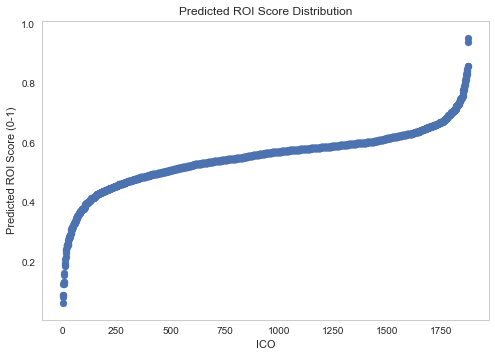

In [1001]:
finscore = master.mean_score.sort_values()

fig = plt.figure(figsize=(30,30))
fig, ax = plt.subplots()
ax.scatter([i for i in range(len(finscore))],finscore)

ax.set(xlabel='ICO', ylabel='Predicted ROI Score (0-1)',
       title='Predicted ROI Score Distribution')
ax.grid()

#fig.savefig("test.png")
plt.show()


In [972]:
master.sort_values?

In [973]:
score_sorted = master.sort_values(by="mean_score", ascending=False)

In [974]:
score_sorted.head(50)

,link_to_ico,token_name,name,about,tags,short_desc,full_desc,closest_topic,topic score,similar_coins,btc_roi,btc_real_roi_score,eth_roi,eth_real_roi_score,usd_roi,usd_real_roi_score,btc_pred_roi,eth_pred_roi,usd_pred_roi,mean_score
1608,https://www.stokit.io/?utm_source=icobench,STO,stokit,There is a growing demand for more aspects of ...,['Internet'],The cloud storage revolution has begun!,There is a growing demand for more aspects of ...,security & privacy,0.306537,BTR INXT CTK TSS,NaN,NaN,NaN,NaN,NaN,NaN,0.936724,0.944683,0.977976,0.952961
548,https://www.cryptyk.com/?utm_source=icobench,CTK,cryptyk (preico),Cryptyk has developed a revolutionary new appr...,"['Big Data', 'Platform']",Hybrid blockchain for enterprise,Cryptyk is building the world's first complete...,security & privacy,0.295979,BTR STO INXT TSS,NaN,NaN,NaN,NaN,NaN,NaN,0.915892,0.936649,0.969171,0.940316
1580,https://storj.io?utm_source=icobench,STORJ,storj,Storj (pronounced: storage) aims to become a c...,"['Platform', 'Software']",Decentralized Cloud Storage,Storj is a protocol that creates a distributed...,security & privacy,0.214470,DNA ZCO TRACE DRGN REM,37.011111,0.676911,-4.266667,0.258252,-5.311111,0.249649,0.798795,0.875836,0.903100,0.858087
321,https://boosteroid.com/?utm_source=icobench,BTR,boosteroid,Boosteroid is a secure cloud services platform...,"['Platform', 'Cryptocurrency']",Personal cloud computer available for anyone,Boosteroid is a cloud services platform that w...,security & privacy,0.224712,STO INXT CTK TSS,NaN,NaN,NaN,NaN,NaN,NaN,0.868423,0.848156,0.855113,0.857190
1272,https://dadi.cloud/?utm_source=icobench,DADI,dadi,"Introducing DADI, a decentralized platform for...","['Business services', 'Platform']",Decentralized web services.,"DADI is a global, decentralized cloud services...",security & privacy,0.228461,INXT BTR STO CTK,NaN,NaN,NaN,NaN,NaN,NaN,0.829364,0.850497,0.868834,0.849412
1666,https://internxt.io/?utm_source=icobench,INXT,internxt,Users can sell the resources of their machines...,['Internet'],Welcome to a New Internet,Internxt is a Peer-To-Peer (P2P) cloud computi...,security & privacy,0.218254,STO BTR CTK TSS,125.611111,0.989967,47.477778,0.767578,106.522222,0.977287,0.822667,0.848542,0.864681,0.845119
1104,https://goldmint.io/?utm_source=icobench,MNTP,goldmint,1 GOLDCRYPTO ASSET = 1 REAL GOLD\nGoldMint com...,"['Investment', 'Platform']",Operating gold-backed cryptoassets GOLD,GoldMint company emits GOLD digital assets on ...,cryptocurrency,0.417074,OGC IC3 ZGC,NaN,NaN,NaN,NaN,NaN,NaN,0.962985,1.057962,0.583105,0.840644
1598,https://onegram.org/?utm_source=icobench,OGC,onegram,Backed by one gram of gold\nOneGram uses block...,['Cryptocurrency'],Backed by one gram of gold,OneGram uses blockchain technology to create a...,cryptocurrency,0.407813,GBC MNTP IC3 ZGC,NaN,NaN,NaN,NaN,NaN,NaN,0.945641,1.042771,0.583887,0.831919
1858,http://zengold.org/?utm_source=icobench,ZGC,zengold,ZenGold is a smart asset system backed by phys...,['Platform'],Smart asset system backed by physical gold,"ZenGold, a project developed on Metaverse Bloc...",cryptocurrency,0.375768,MNTP OGC IC3,NaN,NaN,NaN,NaN,NaN,NaN,0.922290,1.042715,0.596699,0.830991
98,http://zengold.org/?utm_source=icobench,ZGC,zengold,ZenGold is a smart asset system backed by phys...,['Platform'],Smart asset system backed by physical gold,"ZenGold, a project developed on Metaverse Bloc...",cryptocurrency,0.375768,MNTP OGC IC3,NaN,NaN,NaN,NaN,NaN,NaN,0.922290,1.042715,0.596699,0.830991


In [1014]:
score_by_topic = master.groupby('closest_topic')['mean_score'].mean().sort_values()

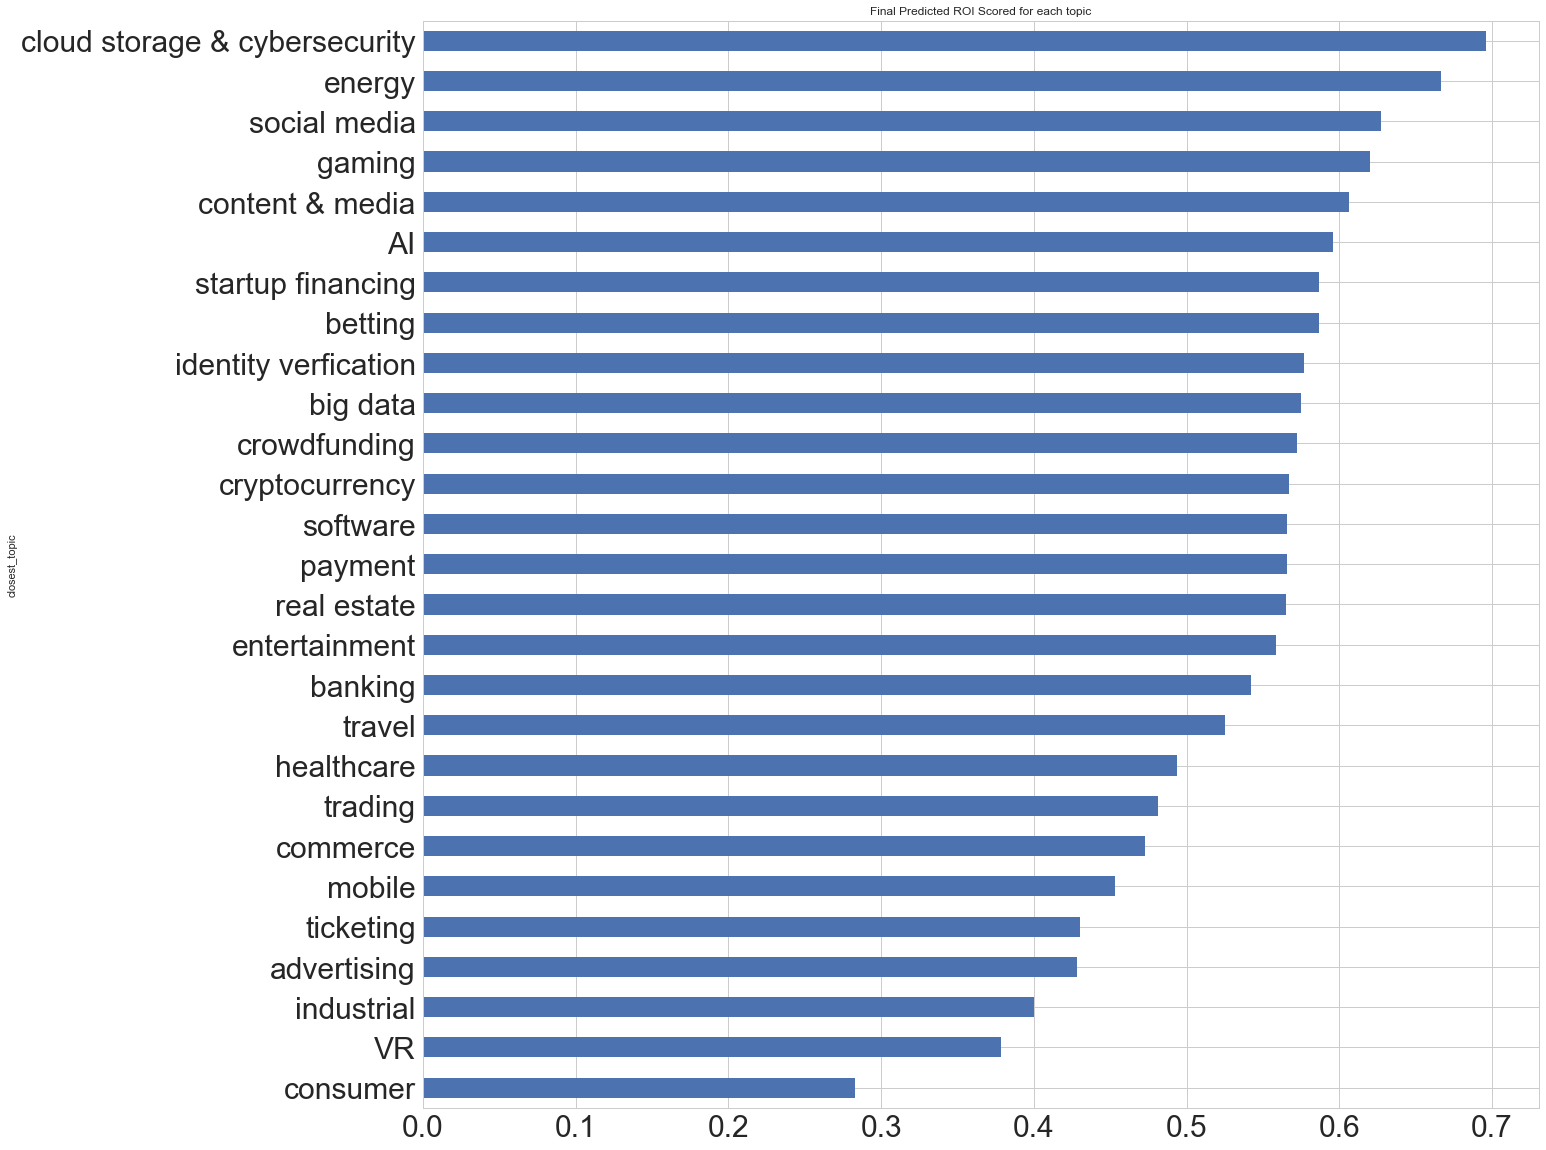

In [1018]:
score_by_topic.plot(kind="barh", figsize=(20,20),
                   title="Final Predicted ROI Scored for each topic",
                   fontsize=30)

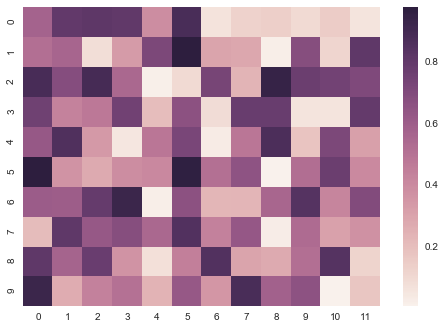

In [1021]:
import seaborn as sns; sns.set()


uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)
#ax = sns.heatmap(u)

In [1022]:
uniform_data

array([[ 0.57140699,  0.80238152,  0.81486744,  0.80536149,  0.39238423,
         0.88144519,  0.05910824,  0.12638063,  0.13682154,  0.09453743,
         0.14910147,  0.05672493],
       [ 0.51454175,  0.56593673,  0.08285343,  0.33108409,  0.71437216,
         0.97706011,  0.29982222,  0.28467713,  0.01960805,  0.68476858,
         0.1140867 ,  0.80932462],
       [ 0.88363172,  0.68545415,  0.88928921,  0.54856899,  0.01474377,
         0.09641439,  0.73369381,  0.24101705,  0.94185344,  0.77013503,
         0.7478712 ,  0.70514215],
       [ 0.75717751,  0.43119406,  0.47443397,  0.75230592,  0.20340665,
         0.66439182,  0.08790418,  0.78052514,  0.78233634,  0.055308  ,
         0.05638725,  0.79232214],
       [ 0.62486931,  0.85718462,  0.34024717,  0.05016039,  0.48037871,
         0.72356262,  0.02966234,  0.48177635,  0.87304552,  0.17428836,
         0.71591219,  0.31650848],
       [ 0.97713348,  0.36514764,  0.27810128,  0.39019845,  0.40950623,
         0.96245513,  